<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Подбор Features importances" data-toc-modified-id="#Подбор Features importances"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подбор Features importances</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tqdm import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Подготовка данных

In [2]:
# импортируем датасеты
cs = pd.read_csv('D:\Data Science\Тестовые\csgo_dataset\players_feats.csv')
cs_train = pd.read_csv(r'D:\Data Science\Тестовые\csgo_dataset\train.csv', delimiter=',')
cs_test = pd.read_csv(r'D:\Data Science\Тестовые\csgo_dataset\test.csv', delimiter=',')

In [3]:
# мердж датасетов с признаками и результатми on map_id and team_id

merge_ord = cs.merge(cs_train, left_on=['map_id','team_id'], right_on=['map_id','team1_id'], how='inner' ).merge(cs_train, on='team2_id', how='left')

merge_ord.shape

(14823, 136)

In [4]:
merge_ord.head()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_id,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_id,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_id,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_id,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name_x,map_id_x,team1_id_x,team2_id,map_name_y,who_win_x,map_id_y,team1_id_y,map_name,who_win_y
0,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,0.89,0.59,75,-13,17,27,0.63,0.89,82.4,15.4,9078,46,65.2,54,0.85,76.9,4.5,3,75,0.61,0.16,0.72,0.07,0.07,0.93,0.85,0.61,34,-8,4,14,0.29,0.62,50.0,5.0,13843,110,40.9,139,0.79,53.8,3.0,8,204,0.54,0.06,0.68,0.06,0.09,0.83,0.79,0.54,80,-29,15,20,0.75,0.87,53.3,8.2,15165,140,40.7,133,1.05,83.9,9.2,8,198,0.71,0.17,0.67,0.07,0.07,1.16,1.04,0.7,84,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635,6665,7532,Ancient,1,524,4608,Mirage,0
1,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,0.89,0.59,75,-13,17,27,0.63,0.89,82.4,15.4,9078,46,65.2,54,0.85,76.9,4.5,3,75,0.61,0.16,0.72,0.07,0.07,0.93,0.85,0.61,34,-8,4,14,0.29,0.62,50.0,5.0,13843,110,40.9,139,0.79,53.8,3.0,8,204,0.54,0.06,0.68,0.06,0.09,0.83,0.79,0.54,80,-29,15,20,0.75,0.87,53.3,8.2,15165,140,40.7,133,1.05,83.9,9.2,8,198,0.71,0.17,0.67,0.07,0.07,1.16,1.04,0.7,84,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635,6665,7532,Ancient,1,98,9215,Mirage,1
2,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,

In [5]:
merge_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14823 entries, 0 to 14822
Columns: 136 entries, p1_id to who_win_y
dtypes: float64(80), int64(53), object(3)
memory usage: 15.5+ MB


In [6]:
merge_ord.isna().sum()

p1_id                                    0
p1_total_kills                           0
p1_headshots                             0
p1_total_deaths                          0
p1_kd_ratio                              0
p1_damage_per_round                      0
p1_grenade_damage_per_round              0
p1_maps_played                           0
p1_rounds_played                         0
p1_kills_per_round                       0
p1_assists_per_round                     0
p1_deaths_per_round                      0
p1_saved_by_teammate_per_round           0
p1_saved_teammates_per_round             0
p1_rating                                0
p1_kill_death                            0
p1_kill_round                            0
p1_rounds_with_kills                     0
p1_kill_death_difference                 0
p1_total_opening_kills                   0
p1_total_opening_deaths                  0
p1_opening_kill_ratio                    0
p1_opening_kill_rating                   0
p1_team_win

In [7]:
merge_ord.describe()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_id,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_id,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_id,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_id,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_id_x,team1_id_x,team2_id,who_win_x,map_id_y,team1_id_y,who_win_y
count,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.00000,14777.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.00000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14810.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14758.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14809.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.00000,

In [8]:
# удаляем NA
merge_ord = merge_ord.dropna(inplace=False)

In [9]:
# проверка дубликатов
merge_ord.duplicated().sum()

0

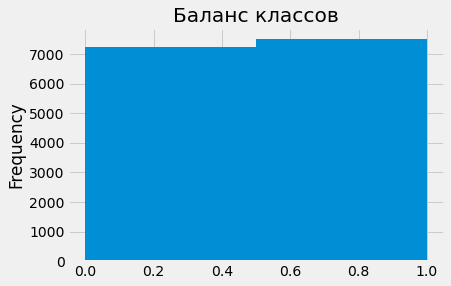

In [10]:
merge_ord['who_win_x'].plot(kind='hist', bins=2)
plt.title('Баланс классов')
plt.show()

In [11]:
merge_ord['who_win_x'].value_counts(normalize=True)

1    0.50913
0    0.49087
Name: who_win_x, dtype: float64

**Вывод**

* Соеденили таблицы 
* Нашли пропуски и удалили их
* Небольшой перевес по классу в who_win_x, дальше в модели буду использовать weighed_classed и stratify для улучшения результатов

## Исследование задачи

In [12]:
# not_informative = ['p1_id','p2_id', 'p3_id', 'p4_id', 'p5_id', 'map_name_y', 'team2_id']
# merge_ord = merge_ord.drop(not_informative, axis=1)

In [13]:
target = merge_ord['who_win_x']
features = merge_ord.drop(['who_win_x'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)


print('Размер обучающей выборки - {}' .format(features_train.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер обучающей выборки - (10311, 135)
Размер валидоционной выборки - (4420, 135)


In [14]:
features_valid, features_test, target_valid, target_test= train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

print('Размер тестовой выборки - {}' .format(features_test.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер тестовой выборки - (2210, 135)
Размер валидоционной выборки - (2210, 135)


In [15]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [16]:
features_test.head()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_id,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_id,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_id,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_id,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_id_x,team1_id_x,team2_id,map_id_y,team1_id_y,who_win_y,map_name_x_Dust2,map_name_x_Inferno,map_name_x_Mirage,map_name_x_Nuke,map_name_x_Overpass,map_name_x_Vertigo,map_name_y_Dust2,map_name_y_Inferno,map_name_y_Mirage,map_name_y_Nuke,map_name_y_Overpass,map_name_y_Vertigo,map_name_Dust2,map_name_Inferno,map_name_Mirage,map_name_Nuke,map_name_Overpass,map_name_Vertigo
3158,284,131,67.9,136,0.96,65.1,2.3,8,224,0.58,0.10,0.61,0.07,0.11,0.97,0.96,0.58,81,-5,12,29,0.41,0.72,41.7,4.1,3741,191,46.1,158,1.21,95.0,6.5,8,224,0.85,0.13,0.71,0.07,0.06,1.29,1.21,0.85,122,33,41,30,1.37,1.36,78.0,26.2,3972,159,54.7,149,1.07,78.6,4.0,8,224,0.71,0.12,0.67,0.08,0.09,1.07,1.07,0.71,103,10,22,17,1.29,1.03,86.4,15.6,9816,89,41.6,86,1.03,75.6,15.4,6,149,0.60,0.23,0.58,0.12,0.09,1.10,1.03,0.60,64,3,10,16,0.62,0.82,90.0,9.8,19230,180,34.4,122,1.48,92.7,1.9,8,210,0.86,0.12,0.58,0.07,0.12,1.43,1.10,0.67,24,3,9,7,1.29,1.35,66.7,21.4,5995,397,5995,6667,640,4869,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11468,12521,83,38.6,83,1.00,80.0,3.8,5,118,0.70,0.16,0.70,0.07,0.04,1.03,1.00,0.70,61,0,12,12,1.00,1.01,66.7,11.3,12553,93,51.6,71,1.31,89.5,4.2,5,118,0.79,0.13,0.60,0.08,0.06,1.24,1.31,0.79,62,22,20,11,1.82,1.36,80.0,22.5,15631,83,51.8,65,1.28,83.0,3.1,5,118,0.70,0.17,0.55,0.03,0.08,1.24,1.28,0.70,52,18,14,6,2.33,1.18,85.7,16.9,18835,80,28.7,67,1.19,67.5,2.7,5,118,0.68,0.03,0.57,0.07,0.04,1.02,1.19,0.68,58,13,10,8,1.25,0.98,80.0,11.3,19750,70,60.0,65,1.08,63.2,0.6,5,118,0.59,0.11,

In [17]:
numeric = [
 'p1_total_kills',
 'p1_headshots',
 'p1_total_deaths',
 'p1_kd_ratio',
 'p1_damage_per_round',
 'p1_grenade_damage_per_round',
 'p1_maps_played',
 'p1_rounds_played',
 'p1_kills_per_round',
 'p1_assists_per_round',
 'p1_deaths_per_round',
 'p1_saved_by_teammate_per_round',
 'p1_saved_teammates_per_round',
 'p1_rating',
 'p1_kill_death',
 'p1_kill_round',
 'p1_rounds_with_kills',
 'p1_kill_death_difference',
 'p1_total_opening_kills',
 'p1_total_opening_deaths',
 'p1_opening_kill_ratio',
 'p1_opening_kill_rating',
 'p1_team_win_percent_after_first_kill',
 'p1_first_kill_in_won_rounds',
 'p2_total_kills',
 'p2_headshots',
 'p2_total_deaths',
 'p2_kd_ratio',
 'p2_damage_per_round',
 'p2_grenade_damage_per_round',
 'p2_maps_played',
 'p2_rounds_played',
 'p2_kills_per_round',
 'p2_assists_per_round',
 'p2_deaths_per_round',
 'p2_saved_by_teammate_per_round',
 'p2_saved_teammates_per_round',
 'p2_rating',
 'p2_kill_death',
 'p2_kill_round',
 'p2_rounds_with_kills',
 'p2_kill_death_difference',
 'p2_total_opening_kills',
 'p2_total_opening_deaths',
 'p2_opening_kill_ratio',
 'p2_opening_kill_rating',
 'p2_team_win_percent_after_first_kill',
 'p2_first_kill_in_won_rounds',
 'p3_total_kills',
 'p3_headshots',
 'p3_total_deaths',
 'p3_kd_ratio',
 'p3_damage_per_round',
 'p3_grenade_damage_per_round',
 'p3_maps_played',
 'p3_rounds_played',
 'p3_kills_per_round',
 'p3_assists_per_round',
 'p3_deaths_per_round',
 'p3_saved_by_teammate_per_round',
 'p3_saved_teammates_per_round',
 'p3_rating',
 'p3_kill_death',
 'p3_kill_round',
 'p3_rounds_with_kills',
 'p3_kill_death_difference',
 'p3_total_opening_kills',
 'p3_total_opening_deaths',
 'p3_opening_kill_ratio',
 'p3_opening_kill_rating',
 'p3_team_win_percent_after_first_kill',
 'p3_first_kill_in_won_rounds',
 'p4_total_kills',
 'p4_headshots',
 'p4_total_deaths',
 'p4_kd_ratio',
 'p4_damage_per_round',
 'p4_grenade_damage_per_round',
 'p4_maps_played',
 'p4_rounds_played',
 'p4_kills_per_round',
 'p4_assists_per_round',
 'p4_deaths_per_round',
 'p4_saved_by_teammate_per_round',
 'p4_saved_teammates_per_round',
 'p4_rating',
 'p4_kill_death',
 'p4_kill_round',
 'p4_rounds_with_kills',
 'p4_kill_death_difference',
 'p4_total_opening_kills',
 'p4_total_opening_deaths',
 'p4_opening_kill_ratio',
 'p4_opening_kill_rating',
 'p4_team_win_percent_after_first_kill',
 'p4_first_kill_in_won_rounds',
 'p5_total_kills',
 'p5_headshots',
 'p5_total_deaths',
 'p5_kd_ratio',
 'p5_damage_per_round',
 'p5_grenade_damage_per_round',
 'p5_maps_played',
 'p5_rounds_played',
 'p5_kills_per_round',
 'p5_assists_per_round',
 'p5_deaths_per_round',
 'p5_saved_by_teammate_per_round',
 'p5_saved_teammates_per_round',
 'p5_rating',
 'p5_kill_death',
 'p5_kill_round',
 'p5_rounds_with_kills',
 'p5_kill_death_difference',
 'p5_total_opening_kills',
 'p5_total_opening_deaths',
 'p5_opening_kill_ratio',
 'p5_opening_kill_rating',
 'p5_team_win_percent_after_first_kill',
 'p5_first_kill_in_won_rounds']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [18]:
def models_AUC(features_train, target_train, features_valid, target_valid):
    model_dt = DecisionTreeClassifier(random_state=12345)
    dt_score = model_dt.fit(features_train, target_train).score(features_valid, target_valid) # используем метод score из библиотеки sklearn
    predicted_valid_dt = model_dt.predict(features_valid)
    print("AUC Дерево решений:", roc_auc_score(target_valid, predicted_valid_dt)) # находим метрику F1
    
    model_rf = RandomForestClassifier(max_depth=5, n_estimators=20, min_samples_leaf=5, random_state=12345)
    rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
    predicted_valid_rf = model_rf.predict(features_valid)
    print("AUC Случайный лес:", roc_auc_score(target_valid, predicted_valid_rf))
    
    model_lr = LogisticRegression(solver = 'liblinear', random_state=12345, class_weight='balanced')
    lr_score = model_lr.fit(features_train, target_train).score(features_valid, target_valid)
    predicted_valid_lr = model_lr.predict(features_valid)
    print("AUC Логистческая регрессия:", roc_auc_score(target_valid, predicted_valid_lr))
    
    print("Точность модели: " "Дерево решений", dt_score, "Случайный лес", rf_score, "Логистческая регрессия", lr_score)

In [19]:
models_AUC(features_train, target_train, features_valid, target_valid)

AUC Дерево решений: 1.0
AUC Случайный лес: 0.8425875191754693
AUC Логистческая регрессия: 0.7246001305529006
Точность модели: Дерево решений 1.0 Случайный лес 0.8420814479638009 Логистческая регрессия 0.7244343891402715


In [20]:
model_rf = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_leaf=5, random_state=12345)
rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
predicted_valid_rf = model_rf.predict(features_valid)
print("AUC Случайный лес:", roc_auc_score(target_valid, predicted_valid_rf))


AUC Случайный лес: 0.9872837871152313


**Вывод**

Результыт обучения модели по 142 признакам плохие, ниже случайного выбора. Попробую оставить только признаки не ниже определенного порога Случайного Леса.

AUC Дерево решений: 0.9956221198156683

AUC Случайный лес: 0.7724198668714798

AUC Логистческая регрессия: 0.5911090629800307

## Подбор Features importances

In [21]:
merge_ord = cs.merge(cs_train, left_on=['map_id','team_id'], right_on=['map_id','team1_id'], how='inner' ).merge(cs_train, on='team2_id', how='left')

merge_ord.shape

(14823, 136)

In [22]:
merge_ord = merge_ord.dropna(inplace=False)

In [23]:
# поиск важных признаков 
f_list = []
i_list = []

for i, item in enumerate(model_rf.feature_importances_):
    f_list.append(features_train.columns[i])
    i_list.append(item)
    
    
    
features_import =  list(zip(f_list, i_list))


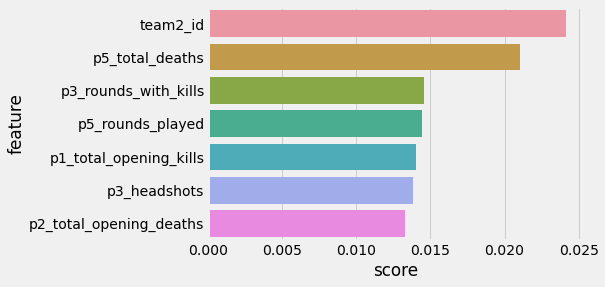

In [24]:
features_import = pd.DataFrame(features_import)

features_import.columns = ['feature', 'score']
features_import = features_import.sort_values('score',ascending=False)
over_threshold = features_import[features_import['score'] > 0.013]
over_threshold['feature'].tolist()

sns.barplot(data=over_threshold, x='score', y='feature')
plt.show()

In [25]:
FEATURES = ['p1_headshots',
 'p2_total_opening_kills',
 'p4_kill_death',
 'p1_total_opening_deaths',
 'p4_total_kills',
 'p5_grenade_damage_per_round',
 'p5_team_win_percent_after_first_kill',
 'p3_opening_kill_ratio',
 'p1_first_kill_in_won_rounds',
 'p4_team_win_percent_after_first_kill',
 'p5_opening_kill_rating']

TARGET = ['who_win_x']

In [26]:

target = merge_ord[TARGET]
features = merge_ord[FEATURES]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)

print('Размер обучающей выборки - {}' .format(features_train.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер обучающей выборки - (10311, 11)
Размер валидоционной выборки - (4420, 11)


In [27]:
features_valid, features_test, target_valid, target_test= train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

print('Размер тестовой выборки - {}' .format(features_test.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер тестовой выборки - (2210, 11)
Размер валидоционной выборки - (2210, 11)


In [28]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [29]:
scaler = StandardScaler()
scaler.fit(features_train[FEATURES])
features_train[FEATURES] = scaler.transform(features_train[FEATURES])
features_valid[FEATURES] = scaler.transform(features_valid[FEATURES])

In [30]:
models_AUC(features_train, target_train, features_valid, target_valid)

AUC Дерево решений: 0.9949863263445762
AUC Случайный лес: 0.7670175378247135
AUC Логистческая регрессия: 0.586731271514815
Точность модели: Дерево решений 0.9950226244343892 Случайный лес 0.7660633484162896 Логистческая регрессия 0.5864253393665159


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\2974069364.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
C:\Users\theli\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Дерево решений переобучилось
* AUC Случайный лес: 0.7724198668714798
* AUC Логистческая регрессия: 0.5911090629800307

In [31]:
best_model_rf_balance = None
best_result_balance = 0
best_depth_balance = 0
best_est_balance = 0

for estimator in tqdm(range(10, 100, 2)):
    for depth in range(10, 20):
        model_rf_balance =  RandomForestClassifier(random_state=12345, n_estimators=estimator, 
                                                   max_depth = depth, class_weight='balanced')
        model_rf_balance.fit(features_train, target_train)
        predicted_valid = model_rf_balance.predict(features_valid)
        print('N estimators:', estimator, 'Глубина:', depth, 'AUC:', roc_auc_score(target_valid, predicted_valid))
        result = roc_auc_score(target_valid, predicted_valid) 
        
        if result > best_result_balance:
            best_model_rf_balance = model_rf_balance
            best_result_balance = result
            best_depth_balance = depth
            best_est_balance = estimator

print("Лучшая AUC-мера", best_result_balance, 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth_balance,
                                                                                           best_est_balance))


  0%|          | 0/45 [00:00<?, ?it/s]

N estimators: 10 Глубина: 10 AUC: 0.9760594318737454


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 10 Глубина: 11 AUC: 0.978767954095176
N estimators: 10 Глубина: 12 AUC: 0.9801025585583816
N estimators: 10 Глубина: 13 AUC:

C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


 0.9909300952282669
N estimators: 10 Глубина: 14 AUC: 0.9936189608021878
N estimators: 10 Глубина: 15 AUC: 0.9931631722880583


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 10 Глубина: 16 AUC: 0.9940747493163172
N estimators: 10 Глубина: 17 AUC: 0.9949863263445762
N estimators: 10 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
  2%|▏         | 1/45 [00:00<00:41,  1.07it/s]C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 10 Глубина: 19 AUC: 0.9949863263445762
N estimators: 12 Глубина: 10 AUC: 0.9733705662998245
N estimators: 12 Глубина: 11 AUC: 0.978767954095176


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 12 Глубина: 12 AUC: 0.9841718941063637
N estimators: 12 Глубина: 13 AUC: 0.9909300952282669
N estimators: 12 Глубина: 14 AUC: 0.9927204882056021


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 12 Глубина: 15 AUC: 0.9931631722880583
N estimators: 12 Глубина: 16 AUC: 0.9949863263445762
N estimators: 12 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
  4%|▍         | 2/45 [00:01<00:41,  1.03it/s]

N estimators: 12 Глубина: 18 AUC: 0.9949863263445762
N estimators: 12 Глубина: 19 AUC: 0.9949863263445762
N estimators: 14 Глубина: 10 AUC: 0.9688585466693859


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 14 Глубина: 11 AUC: 0.9796729789075982
N estimators: 14 Глубина: 12 AUC: 0.9873362048419237
N estimators: 14 Глубина: 13 AUC: 

C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


0.9940747493163172
N estimators: 14 Глубина: 14 AUC: 0.9927204882056021


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 14 Глубина: 15 AUC: 0.9931631722880583
N estimators: 14 Глубина: 16 AUC: 0.9940747493163172
N estimators: 14 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
  7%|▋         | 3/45 [00:03<00:42,  1.02s/it]

N estimators: 14 Глубина: 18 AUC: 0.9949863263445762
N estimators: 14 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 16 Глубина: 10 AUC: 0.9706882529417402
N estimators: 16 Глубина: 11 AUC: 0.9796598744759252


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 16 Глубина: 12 AUC: 0.9850834711346228
N estimators: 16 Глубина: 13 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 16 Глубина: 14 AUC: 0.9940747493163172
N estimators: 16 Глубина: 15 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 16 Глубина: 16 AUC: 0.9949863263445762
N estimators: 16 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
  9%|▉         | 4/45 [00:04<00:45,  1.10s/it]

N estimators: 16 Глубина: 18 AUC: 0.9949863263445762
N estimators: 16 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 18 Глубина: 10 AUC: 0.9738394592456271
N estimators: 18 Глубина: 11 AUC: 0.9832341082147588


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 18 Глубина: 12 AUC: 0.9873362048419237
N estimators: 18 Глубина: 13 AUC: 0.9922909085548187


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 18 Глубина: 14 AUC: 0.9940747493163172
N estimators: 18 Глубина: 15 AUC: 0.9945370900462833


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 18 Глубина: 16 AUC: 0.9954486670745422
N estimators: 18 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 11%|█         | 5/45 [00:05<00:47,  1.19s/it]

N estimators: 18 Глубина: 18 AUC: 0.9954486670745422
N estimators: 18 Глубина: 19 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 20 Глубина: 10 AUC: 0.9783252700127193
N estimators: 20 Глубина: 11 AUC: 0.9873231004102506


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 20 Глубина: 12 AUC: 0.9900316226316811
N estimators: 20 Глубина: 13 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 20 Глубина: 14 AUC: 0.9940747493163172
N estimators: 20 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 20 Глубина: 16 AUC: 0.9949863263445762
N estimators: 20 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 13%|█▎        | 6/45 [00:07<00:50,  1.30s/it]

N estimators: 20 Глубина: 18 AUC: 0.9954486670745422
N estimators: 20 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 22 Глубина: 10 AUC: 0.9774399018478068
N estimators: 22 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 22 Глубина: 12 AUC: 0.9900316226316811
N estimators: 22 Глубина: 13 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 22 Глубина: 14 AUC: 0.9940747493163172
N estimators: 22 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 22 Глубина: 16 AUC: 0.9954486670745422
N estimators: 22 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 16%|█▌        | 7/45 [00:08<00:53,  1.41s/it]

N estimators: 22 Глубина: 18 AUC: 0.9954486670745422
N estimators: 22 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 24 Глубина: 10 AUC: 0.9819126081832261
N estimators: 24 Глубина: 11 AUC: 0.9882215730068366


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 24 Глубина: 12 AUC: 0.9900316226316811
N estimators: 24 Глубина: 13 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 24 Глубина: 14 AUC: 0.9940747493163172
N estimators: 24 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 24 Глубина: 16 AUC: 0.9954486670745422
N estimators: 24 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 24 Глубина: 18 AUC: 0.9954486670745422
N estimators: 24 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 18%|█▊        | 8/45 [00:10<00:57,  1.54s/it]C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 26 Глубина: 10 AUC: 0.97786948149859
N estimators: 26 Глубина: 11 AUC: 0.9882215730068366


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 26 Глубина: 12 AUC: 0.9895823863333882
N estimators: 26 Глубина: 13 AUC: 0.9945370900462833


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 26 Глубина: 14 AUC: 0.9940747493163172
N estimators: 26 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 26 Глубина: 16 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 26 Глубина: 17 AUC: 0.9949863263445762
N estimators: 26 Глубина: 18 AUC: 

C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 20%|██        | 9/45 [00:12<00:59,  1.66s/it]

N estimators: 26 Глубина: 19 AUC: 0.9949863263445762
N estimators: 28 Глубина: 10 AUC: 0.9805648992883476


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 11 AUC: 0.9900185182000081


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 12 AUC: 0.9886839137368024
N estimators: 28 Глубина: 13 AUC: 0.9940878537479904


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 16 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 28 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 22%|██▏       | 10/45 [00:14<01:03,  1.80s/it]

N estimators: 28 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 10 AUC: 0.980122215205891
N estimators: 30 Глубина: 11 AUC: 0.9904743067141375


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 12 AUC: 0.9886839137368024


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 13 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 16 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 30 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 24%|██▍       | 11/45 [00:16<01:05,  1.92s/it]

N estimators: 30 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 10 AUC: 0.9832668692939415


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 11 AUC: 0.9904743067141375


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 12 AUC: 0.9877854411402166


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 13 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 32 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 27%|██▋       | 12/45 [00:19<01:07,  2.06s/it]

N estimators: 32 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 10 AUC: 0.9819257126148992


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 11 AUC: 0.9904743067141375


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 12 AUC: 0.9877854411402166


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 13 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 34 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 29%|██▉       | 13/45 [00:21<01:10,  2.19s/it]

N estimators: 34 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 10 AUC: 0.9814699241007698


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 11 AUC: 0.9904743067141375


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 12 AUC: 0.9895823863333882


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 13 AUC: 0.9945370900462833


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 36 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 31%|███       | 14/45 [00:24<01:11,  2.31s/it]

N estimators: 36 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 10 AUC: 0.978318717796883


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 11 AUC: 0.9904743067141375


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 13 AUC: 0.9945370900462833


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 16 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 38 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 33%|███▎      | 15/45 [00:27<01:13,  2.45s/it]

N estimators: 38 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 10 AUC: 0.9787745063110124


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 12 AUC: 0.9900316226316811


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 13 AUC: 0.9945370900462833


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 40 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 36%|███▌      | 16/45 [00:29<01:14,  2.58s/it]

N estimators: 40 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 10 AUC: 0.9850834711346228


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 13 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 15 AUC: 0.9954486670745422


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 42 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 38%|███▊      | 17/45 [00:32<01:16,  2.72s/it]

N estimators: 42 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 10 AUC: 0.9837423144555805


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 14 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 44 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 40%|████      | 18/45 [00:36<01:16,  2.85s/it]

N estimators: 44 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 10 AUC: 0.9855392596487521


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 13 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 46 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 42%|████▏     | 19/45 [00:39<01:17,  2.99s/it]

N estimators: 46 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 10 AUC: 0.9832930781572876


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 13 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 48 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 44%|████▍     | 20/45 [00:42<01:17,  3.11s/it]

N estimators: 48 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 10 AUC: 0.9832930781572876


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 50 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 47%|████▋     | 21/45 [00:46<01:17,  3.24s/it]

N estimators: 50 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 10 AUC: 0.9783514788760657


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 12 AUC: 0.9936255130180244


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 52 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 49%|████▉     | 22/45 [00:50<01:17,  3.38s/it]

N estimators: 52 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 10 AUC: 0.9783514788760657


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 54 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 51%|█████     | 23/45 [00:53<01:17,  3.52s/it]

N estimators: 54 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 10 AUC: 0.9850900233504593


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 56 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 53%|█████▎    | 24/45 [00:57<01:16,  3.65s/it]

N estimators: 56 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 10 AUC: 0.9828307374273216


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 58 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 56%|█████▌    | 25/45 [01:01<01:15,  3.79s/it]

N estimators: 58 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 10 AUC: 0.9801353196375643


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 11 AUC: 0.9882346774385095


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 60 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 58%|█████▊    | 26/45 [01:06<01:14,  3.93s/it]

N estimators: 60 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 10 AUC: 0.9832799737256145


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 62 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 60%|██████    | 27/45 [01:10<01:13,  4.06s/it]

N estimators: 62 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 10 AUC: 0.9832799737256145


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 64 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 62%|██████▏   | 28/45 [01:15<01:11,  4.21s/it]

N estimators: 64 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 10 AUC: 0.9841915507538733


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 66 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 64%|██████▍   | 29/45 [01:19<01:09,  4.35s/it]

N estimators: 66 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 10 AUC: 0.9841915507538733


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 68 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 67%|██████▋   | 30/45 [01:24<01:07,  4.49s/it]

N estimators: 68 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 10 AUC: 0.9882346774385095


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 70 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 69%|██████▉   | 31/45 [01:29<01:04,  4.63s/it]

N estimators: 70 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 10 AUC: 0.9882346774385095


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 72 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 71%|███████   | 32/45 [01:34<01:01,  4.76s/it]

N estimators: 72 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 10 AUC: 0.9882346774385095


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 74 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 73%|███████▎  | 33/45 [01:39<00:58,  4.91s/it]

N estimators: 74 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 10 AUC: 0.985988495947045


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 76 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 76%|███████▌  | 34/45 [01:45<00:55,  5.04s/it]

N estimators: 76 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 10 AUC: 0.9868869685436308


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 78 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 78%|███████▊  | 35/45 [01:50<00:51,  5.17s/it]

N estimators: 78 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 10 AUC: 0.9868869685436308


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 80 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 80%|████████  | 36/45 [01:56<00:47,  5.33s/it]

N estimators: 80 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 10 AUC: 0.9850900233504593


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 82 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 82%|████████▏ | 37/45 [02:02<00:43,  5.48s/it]

N estimators: 82 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 10 AUC: 0.9868869685436308


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 84 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 84%|████████▍ | 38/45 [02:08<00:39,  5.61s/it]

N estimators: 84 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 10 AUC: 0.9850900233504593


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 86 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 87%|████████▋ | 39/45 [02:14<00:34,  5.77s/it]

N estimators: 86 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 10 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 11 AUC: 0.9909300952282669


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 88 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 89%|████████▉ | 40/45 [02:20<00:29,  5.90s/it]

N estimators: 88 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 10 AUC: 0.9850900233504593


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 11 AUC: 0.9891331500350954


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 90 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 91%|█████████ | 41/45 [02:26<00:24,  6.04s/it]

N estimators: 90 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 10 AUC: 0.9873362048419237


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 92 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 93%|█████████▎| 42/45 [02:33<00:18,  6.17s/it]

N estimators: 92 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 10 AUC: 0.9832930781572876


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 94 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 96%|█████████▌| 43/45 [02:40<00:12,  6.31s/it]

N estimators: 94 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 10 AUC: 0.9855392596487521


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 96 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
 98%|█████████▊| 44/45 [02:46<00:06,  6.46s/it]

N estimators: 96 Глубина: 19 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 10 AUC: 0.9873362048419237


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 11 AUC: 0.9918285678248527


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 12 AUC: 0.9940747493163172


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 13 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 14 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 15 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 16 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 17 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)


N estimators: 98 Глубина: 18 AUC: 0.9949863263445762


C:\Users\theli\AppData\Local\Temp\ipykernel_6936\3474906490.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_balance.fit(features_train, target_train)
100%|██████████| 45/45 [02:53<00:00,  3.86s/it]

N estimators: 98 Глубина: 19 AUC: 0.9949863263445762
Лучшая AUC-мера 0.9954486670745422 при глубине = 16 и количестве деревьев = 18


In [32]:
merge_ord.head()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_id,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_id,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_id,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_id,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name_x,map_id_x,team1_id_x,team2_id,map_name_y,who_win_x,map_id_y,team1_id_y,map_name,who_win_y
0,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,0.89,0.59,75,-13,17,27,0.63,0.89,82.4,15.4,9078,46,65.2,54,0.85,76.9,4.5,3,75,0.61,0.16,0.72,0.07,0.07,0.93,0.85,0.61,34,-8,4,14,0.29,0.62,50.0,5.0,13843,110,40.9,139,0.79,53.8,3.0,8,204,0.54,0.06,0.68,0.06,0.09,0.83,0.79,0.54,80,-29,15,20,0.75,0.87,53.3,8.2,15165,140,40.7,133,1.05,83.9,9.2,8,198,0.71,0.17,0.67,0.07,0.07,1.16,1.04,0.7,84,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635,6665,7532,Ancient,1,524,4608,Mirage,0
1,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,0.89,0.59,75,-13,17,27,0.63,0.89,82.4,15.4,9078,46,65.2,54,0.85,76.9,4.5,3,75,0.61,0.16,0.72,0.07,0.07,0.93,0.85,0.61,34,-8,4,14,0.29,0.62,50.0,5.0,13843,110,40.9,139,0.79,53.8,3.0,8,204,0.54,0.06,0.68,0.06,0.09,0.83,0.79,0.54,80,-29,15,20,0.75,0.87,53.3,8.2,15165,140,40.7,133,1.05,83.9,9.2,8,198,0.71,0.17,0.67,0.07,0.07,1.16,1.04,0.7,84,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635,6665,7532,Ancient,1,98,9215,Mirage,1
2,4954,90,42.2,112,0.8,76.3,5.9,6,156,0.58,0.24,0.72,0.13,0.05,0.98,0.8,0.58,62,-22,10,13,0.77,0.85,60.0,8.2,7412,106,35.8,119,0.89,66.8,5.6,7,181,0.59,0.09,0.66,0.07,0.06,0.91,

**XGBoost**

In [33]:
merge_ord = cs.merge(cs_train, left_on=['map_id','team_id'], right_on=['map_id','team1_id'], how='inner' ).merge(cs_train, on='team2_id', how='left')

In [34]:
X = merge_ord[FEATURES]
y = merge_ord[TARGET]  

In [35]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [36]:
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [37]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [38]:
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [39]:
xgb_cl = xgb.XGBClassifier()


In [40]:
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=12345
)

In [41]:
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)

preds = xgb_cl.predict(X_test)

accuracy_score(y_test, preds)

0.9954128440366973

In [42]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [43]:
# XGB классифиер
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# подбираем гиперпараметры Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv.fit(X_processed, y_processed)

grid_cv.best_score_
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

# Тестирование модели

In [44]:
final_cl = xgb.XGBClassifier(
    gamma=5,
    learning_rate=0.1,
    max_depth=3,
    reg_lambda=0,
    scale_pos_weight=1,
    objective="binary:logistic",
    colsample_bytree=0.5,
    subsample=0.8
)

In [45]:
_ = final_cl.fit(X_train, y_train)

preds = final_cl.predict(X_test)
print(accuracy_score(y_test, preds))

0.8936859147328656


In [46]:
def my_plot_importance(booster, figsize, **kwargs):
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

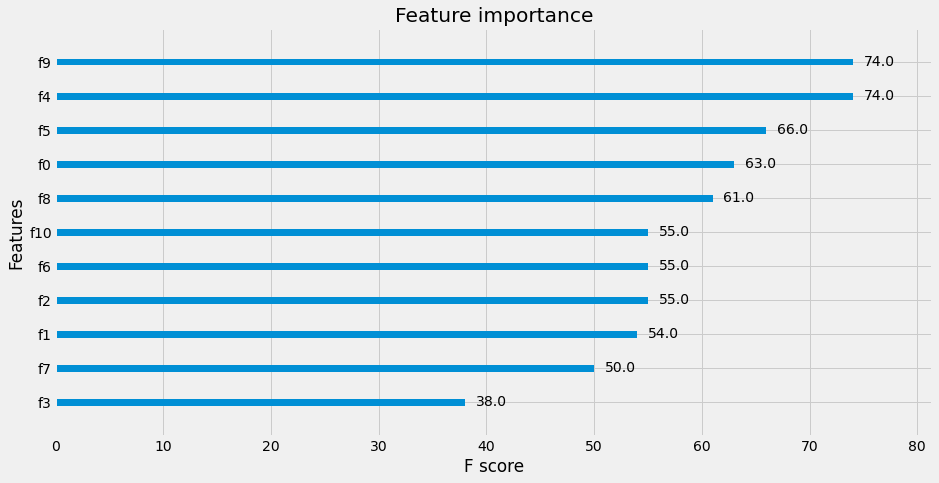

In [47]:
my_plot_importance(final_cl, figsize=(14, 7))

**Вывод**

Результат Моделей


* AUC Случайный лес: 0.7724198668714798 на валидионной выборке


*  AUC XGBoost 0.8936859147328656

